# Step 9 - Analyzing Cokriging data

In [1]:
# These lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp

# Importing auxiliary libraries
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy.stats
from scipy import spatial
from scipy import optimize
from scipy import special

In [2]:
domain = pd.read_csv("domain3d.csv")
data = pd.read_csv("data3d_2prop.csv")

In [3]:
data.head()

,X,Y,Z,Property1,Property2
0,887.5,0.833333,1012.55273,22.973377,25.396426
1,2637.5,66.944440,786.60340,23.024174,24.446916
2,1587.5,0.833333,1213.39660,22.338927,32.665561
3,2937.5,133.055560,535.54850,13.949367,20.073849
4,1562.5,0.833333,1188.29110,31.606379,43.381292


In [4]:
mean = np.mean(data['Property1'])
max_val = np.max(data['Property1'])
min_val = np.min(data['Property1'])
print("mean prop1 = %f" %mean)
print("max prop1 = %f" %max_val)
print("min prop1= %f" %min_val)
variance = np.var(data['Property1'])
std = np.sqrt(variance)
print("std prop1 = %f" %std)

mean = np.mean(data['Property2'])
max_val = np.max(data['Property2'])
min_val = np.min(data['Property2'])
print("mean prop2 = %f" %mean)
print("max prop2 = %f" %max_val)
print("min prop2= %f" %min_val)
variance = np.var(data['Property2'])
std = np.sqrt(variance)
print("std prop2 = %f" %std)

mean prop1 = 23.113068
max prop1 = 42.251722
min prop1= 0.012933
std prop1 = 5.816851
mean prop2 = 28.150968
max prop2 = 48.322859
min prop2= 5.895417
std prop2 = 5.767670


Text(0.5,1,'(b) Cumulative histogram using 50 bins')

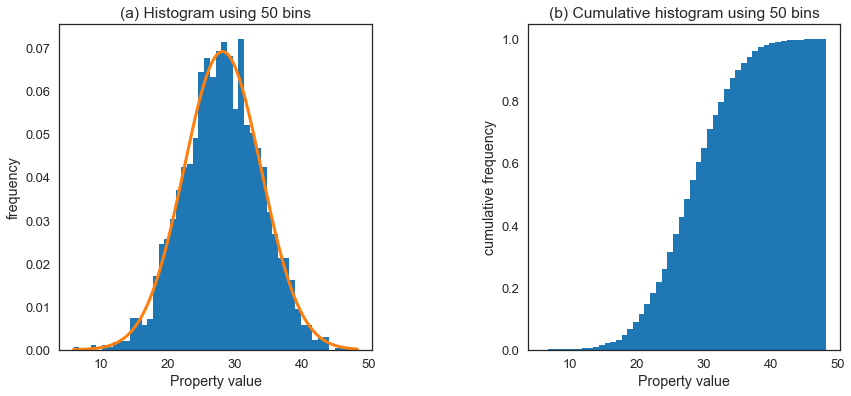

In [5]:
#show histogram (normal and cumulative)
fig4 = plt.figure(figsize = (14, 6)) 
fig4.subplots_adjust(wspace=.5)
bin_amount = 50

ax41 = fig4.add_subplot(121)
ax42 = fig4.add_subplot(122)

x_vals = np.arange(min_val, max_val, 0.1)

ax41.hist(data['Property2'], bins=bin_amount, normed=True);
ax41.plot(x_vals, scipy.stats.norm.pdf(x_vals, mean, std), lw = 3)
ax41.set_xlabel("Property value")
ax41.set_ylabel("frequency")
ax41.set_title('(a) Histogram using %i bins' %bin_amount)

ax42.hist(data['Property2'], bins=bin_amount, normed=True, cumulative=True);
ax42.set_xlabel("Property value")
ax42.set_ylabel("cumulative frequency")
ax42.set_title('(b) Cumulative histogram using %i bins' %bin_amount)

In [6]:
pos = 0
h = np.empty((len(data), len(data)))
gamma1 = np.empty((len(data), len(data)))
gamma2 = np.empty((len(data), len(data)))
gamma3 = np.empty((len(data), len(data)))
gamma4 = np.empty((len(data), len(data)))

data_m = data.as_matrix(('X','Y','Z'))
data_v1 = data['Property1'].values
data_v2 = data['Property2'].values


for pos in range (len(data)):
    for i in range (len(data)):
        gamma1[pos, i] = ((data_v1[i]-data_v1[pos])**2)/2
        gamma2[pos, i] = ((data_v2[i]-data_v2[pos])**2)/2
        gamma3[pos, i] = ((data_v1[i]-data_v2[pos])**2)/2
        gamma4[pos, i] = ((data_v2[i]-data_v1[pos])**2)/2
        h[pos, i] = spatial.distance.euclidean(data_m[i], data_m[pos])

In [11]:
bins = bin_amount
maxim = 200
bin_size = maxim/bins
a = 0

h_bins = np.empty(bins)
ave_vals1 = np.empty(bins)
ave_vals2 = np.empty(bins)
ave_vals3 = np.empty(bins)
ave_vals4 = np.empty(bins)

for j in range (bins):
    bi = np.where((h > a)*(h < (a+bin_size)))
    ave_vals1[j] = np.average(gamma1[bi])
    ave_vals2[j] = np.average(gamma2[bi])
    ave_vals3[j] = np.average(gamma3[bi])
    ave_vals4[j] = np.average(gamma4[bi])
    h_bins[j] = (a+a+bin_size)/2
    a += bin_size

C:\Users\Jan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


(10, 60)

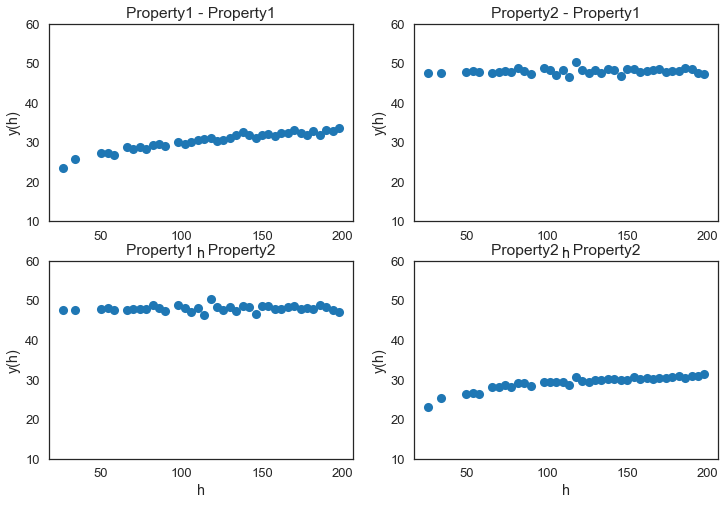

In [15]:
figure = plt.figure(figsize=(12,8))

ax1 = figure.add_subplot(2,2,1)
ax1.set_xlabel("h")
ax1.set_ylabel("y(h)")
ax1.set_title('Property1 - Property1')
ax1.plot(h_bins, ave_vals1,'o')
ax1.set_ylim(10,60)

ax2 = figure.add_subplot(2,2,3)
ax2.set_xlabel("h")
ax2.set_ylabel("y(h)")
ax2.set_title('Property1 - Property2')
ax2.plot(h_bins, ave_vals3,'o')
ax2.set_ylim(10,60)

ax3 = figure.add_subplot(2,2,2)
ax3.set_xlabel("h")
ax3.set_ylabel("y(h)")
ax3.set_title('Property2 - Property1')
ax3.plot(h_bins, ave_vals4,'o')
ax3.set_ylim(10,60)


ax4 = figure.add_subplot(2,2,4)
ax4.set_xlabel("h")
ax4.set_ylabel("y(h)")
ax4.set_title('Property2 - Property2')
ax4.plot(h_bins, ave_vals2,'o')
ax4.set_ylim(10,60)
